 ## Citibike Tripdata Exploration

This is a notebook about the results of citibike tripdata exploration.
We are looking at citibike trips in 2017. 
Here I will analyze the user types, and citibike tripdata trends I found.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# read the csv file
df = pd.read_csv('./final_trip_data.csv')

In [19]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1           float64
tripduration             int64
starttime               object
stoptime                object
start station name      object
end station name        object
usertype                object
birth year             float64
gender                   int64
start_station_geoid    float64
end_station_geoid      float64
dtype: object

In [20]:
#transform to datetime object
df['starttime']=pd.to_datetime(df['starttime'], format='%Y-%m-%d %H:%M:%S')

In [22]:
df['stoptime']=pd.to_datetime(df['stoptime'], format='%Y-%m-%d %H:%M:%S')

In [23]:
df.dtypes

Unnamed: 0                      int64
Unnamed: 0.1                  float64
tripduration                    int64
starttime              datetime64[ns]
stoptime               datetime64[ns]
start station name             object
end station name               object
usertype                       object
birth year                    float64
gender                          int64
start_station_geoid           float64
end_station_geoid             float64
dtype: object

In [ ]:
#drop columns where user's are subs

### Trips by time 

In [24]:
df['start hour']=df['starttime'].dt.hour.astype('category')
df['start day']=df['starttime'].dt.day.astype('category') 
df['weekday']=df['starttime'].dt.weekday.astype('category')

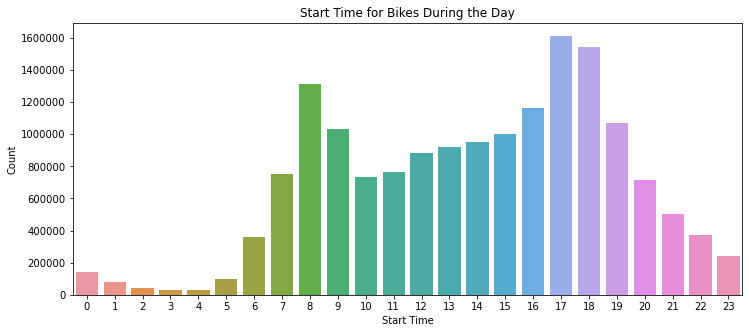

In [71]:
plt.figure(figsize=(12,5))
time= sns.countplot(data=df, x="start hour")
plt.ticklabel_format(style='plain', axis='y')
time.set(xlabel='Start Time', ylabel='Count',title="Start Time for Bikes During the Day")
plt.show()

From this graph we can see that people tend to ride bikes mostly at 8-9am, and 4-7pm usual times when people commute from and to work. This graph was made excluding the weekends. 

### Number of Trips Per Month

In [31]:
df['months']=df['starttime'].dt.month.astype('category')

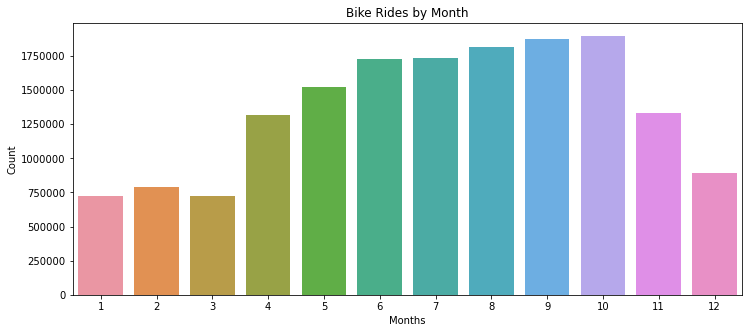

In [42]:

plt.figure(figsize=(12,5))
time= sns.countplot(data=df, x="months");
plt.ticklabel_format(style='plain', axis='y')
time.set(xlabel='Months', ylabel='Count',title="Bike Rides by Month")
plt.show()

From this we can see that in 2017, people ride bikes the most at times from April to October when the weather is warm

### Trip Duration Plot

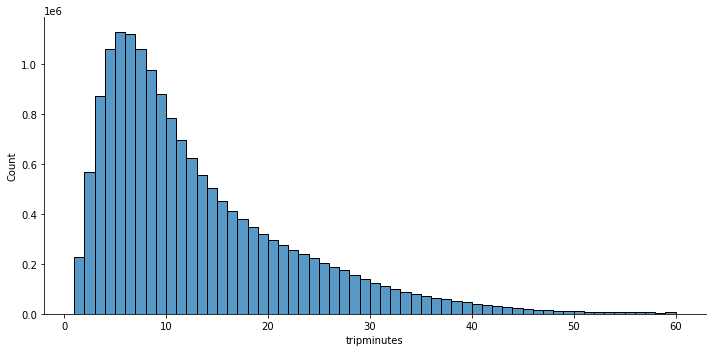

In [8]:
df['tripminutes'] = df['tripduration'] // 60
sns.displot(data=df,x="tripminutes", bins=range(1,61), aspect=10/5);

For trip duration by minutes we get a right-skewed graph where most of the trip times don't exceed 20minutes. 
From this we can see that New York City bike-riders don't travel very far distances.

In [2]:
# read the csv file
df = pd.read_csv('./clean_trip_data.csv')

In [3]:
df.head()

,Unnamed: 0,starttime,stoptime,start station name,end station name,usertype,birth year,gender,start_station_geoid,end_station_geoid,tripminutes
0,0,2017-01-01 00:00:21,2017-01-01 00:11:41,W 82 St & Central Park West,Central Park West & W 72 St,Subscriber,1965.0,2,3.606102e+10,3.606101e+10,11
1,1,2017-01-01 00:00:45,2017-01-01 00:22:08,Cooper Square & E 7 St,Broadway & W 32 St,Subscriber,1987.0,2,3.606100e+10,3.606101e+10,21
2,6,2017-01-01 00:05:00,2017-01-01 00:14:20,Broadway & W 60 St,9 Ave & W 45 St,Subscriber,1973.0,1,3.606101e+10,3.606101e+10,9
3,7,2017-01-01 00:05:37,2017-01-01 00:19:24,Broadway & W 37 St,E 10 St & Avenue A,Subscriber,1977.0,2,3.606101e+10,3.606100e+10,13
4,8,2017-01-01 00:05:47,2017-01-01 00:10:02,York St & Jay St,Carlton Ave & Flushing Ave,Subscriber,1989.0,1,3.604700e+10,3.604702e+10,4


In [4]:
df.columns

Index(['Unnamed: 0', 'starttime', 'stoptime', 'start station name',
       'end station name', 'usertype', 'birth year', 'gender',
       'start_station_geoid', 'end_station_geoid', 'tripminutes'],
      dtype='object')

In [6]:
#Identify the 10 most popular trips
trips_df = pd.DataFrame()
trips_df = df.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips', ascending = False)
trips_df['start station name'] = trips_df["start station name"].astype(str)
trips_df["end station name"] = trips_df["end station name"].astype(str)
trips_df["Trip"] = trips_df["start station name"] + " to " + trips_df["end station name"]
trips_df = trips_df[:10]
trips_df = trips_df.drop(['start station name', "end station name"], axis = 1)
trips_df = trips_df.reset_index()

/Users/seongheelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


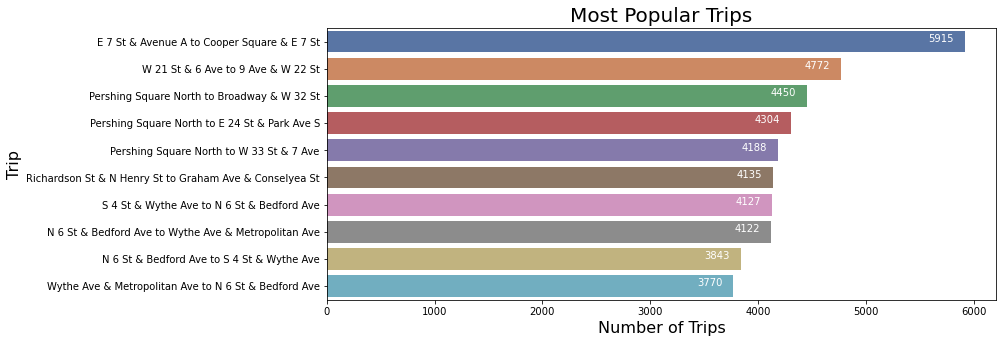

In [9]:
plt.figure(figsize=(12,5))
ax4 = sns.barplot('Number of Trips','Trip', data = trips_df, palette="deep")
ax4.set_title('Most Popular Trips', fontsize = 20)
ax4.set_ylabel("Trip",fontsize=16)
ax4.set_xlabel("Number of Trips",fontsize=16)
for index, row in trips_df.iterrows():
    ax4.text(row['Number of Trips']-220,index,row['Number of Trips'], 
             color='white', ha="center",fontsize = 10)
plt.show()